In [1]:
import sys
import os
# Get the absolute path to the project root
project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
# Add it to sys.path
sys.path.append(project_root)

In [2]:
from bimpcc.dataset import get_dataset
from bimpcc.models.tvregularized import TVRegularized
import matplotlib.pyplot as plt
from skimage.metrics import peak_signal_noise_ratio as psnr

In [3]:
def plot_experiment(true,noisy,u, alpha):
    
    fig,ax = plt.subplots(1,3,figsize=(14,4))
    ax[0].imshow(true,cmap='gray')
    ax[0].set_title('True Image')
    ax[0].axis('off')
    ax[1].imshow(noisy,cmap='gray')
    ax[1].set_title('Noisy Image\nPSNR: {:.4f}'.format(psnr(true,noisy)))
    ax[1].axis('off')
    ax[2].imshow(u,cmap='gray')
    ax[2].set_title(f'Reconstructed Image\nPSNR: {psnr(true,u):.4f}\n alpha = {alpha}')
    # ax[2].set_xlabel('alpha = {}'.format(alpha))
    ax[2].axis('off')

    plt.show()

In [26]:
scale = 90

In [27]:
dataset = get_dataset("cameraman",scale=scale)
true, noisy = dataset.get_training_data()

(np.float64(-0.5), np.float64(89.5), np.float64(89.5), np.float64(-0.5))

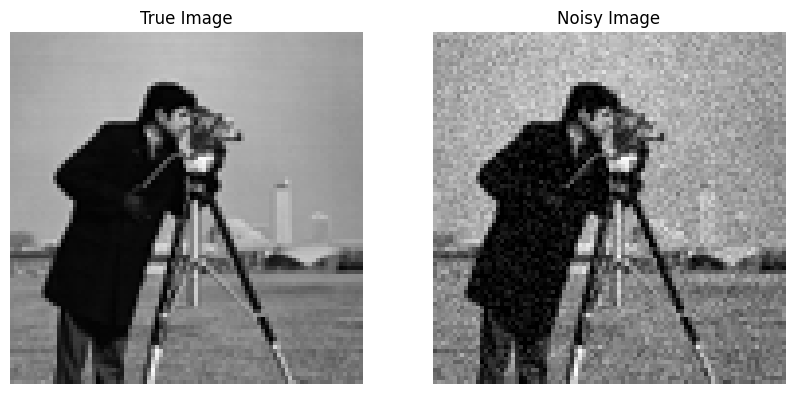

In [28]:
fig,ax = plt.subplots(1,2,figsize=(10,5))
ax[0].imshow(true,cmap='gray')
ax[0].set_title('True Image')
ax[0].axis('off')
ax[1].imshow(noisy,cmap='gray')
ax[1].set_title('Noisy Image')
ax[1].axis('off')

In [29]:
model = TVRegularized(true, noisy, epsilon=1e-3)

In [ ]:
res,x_opt,fun_opt = model.solve(max_iter=3000,tol=1e-4,print_level=5)

This is Ipopt version 3.14.17, running with linear solver MUMPS 5.6.2.

Number of nonzeros in equality constraint Jacobian...:   135904
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:        0

Total number of variables............................:    24121
                     variables with only lower bounds:     8101
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:    24120
Total number of inequality constraints...............:        0
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        0

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0  9.1914941e+00 1.10e-02 7.37e-02   0.0 0.00e+00    -  0.00e+00 0.00e+00 

In [31]:
u, q, alpha = model.objective_func.parse_vars(x_opt)

In [32]:
N = scale**2
M = 2*scale*(scale-1)
u = x_opt[:N]
q = x_opt[N: N+M]
alpha = x_opt[N+M:]

In [11]:
print(alpha)

[0.01395166]


In [12]:
print(q)

[-0.00571019  0.00174494  0.00099793 -0.01386012  0.01172901  0.01005022
 -0.01086285  0.0136449   0.01200554  0.00296437  0.01392992 -0.00350823
 -0.0127296  -0.01384211 -0.01391593 -0.00159562 -0.00755509  0.00967688
 -0.00875488 -0.00290958  0.00710747  0.0136331  -0.00077871 -0.0135034 ]


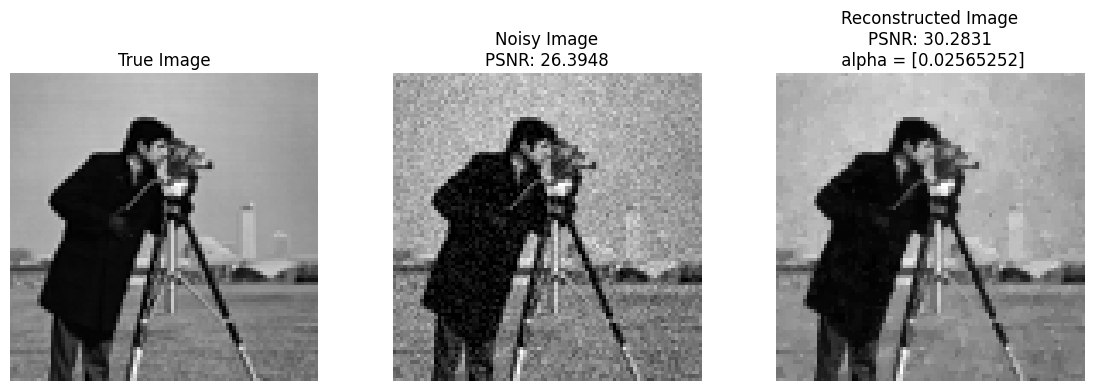

In [11]:
u = u.reshape((scale,scale))
plot_experiment(true,noisy,u,alpha)